# Tarea 1
### Regresión Lineal

Estudiantes: 

Carlos Adrián Araya Ramírez---------2018319701

Michael Shakime Richards Sparks----2018170667

# 2.1.1.


In [365]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time


In [366]:
class LinearRegression:

    def __init__(self, n_features):
        self.W = np.random.normal(-1, 1, (n_features, 1))  # weights
        self.b = np.random.rand(1)  # intercept

    def descent(self, delta_W, delta_b, learning_rate):
        # updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W
        self.b -= learning_rate*delta_b

    def derivatives(self, X, Y):
        # partial derivative of cost w.r.t the weights
        delta_W = np.sum(np.multiply(
            ((np.matmul(X, self.W)+self.b)-Y), X))*2/X.shape[0]
        # partial derivative of cost w.r.t the intercept
        delta_b = np.sum(((np.matmul(X, self.W)+self.b)-Y))*2/X.shape[0]
        return delta_W, delta_b

    # fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = np.array(X).reshape(-1, 1)
        Y = np.array(Y).reshape(-1, 1)

        for i in range(epochs):

            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)

        return self.W, self.b

    def predict(self, X):
        #         print(X.shape, X.reshape(-1,1).shape)
        product = np.matmul(np.array(X).reshape(-1, 1), self.W)+self.b
        return product


# 2.1.2.


In [367]:
import sklearn.datasets as datasets
import pandas as pd
from matplotlib import pyplot as plt
dataset = datasets.load_iris(as_frame=True)

features = dataset.data
target = dataset.target

labels = []

for i in target.to_list():
    labels.append(dataset.target_names[i])

data = {'Flower': labels ,'sepal length (cm)': features['sepal length (cm)'], 'petal width (cm)': features['petal width (cm)']}

pd.DataFrame(data).head(10)


,Flower,sepal length (cm),petal width (cm)
0,setosa,5.1,0.2
1,setosa,4.9,0.2
2,setosa,4.7,0.2
3,setosa,4.6,0.2
4,setosa,5.0,0.2
5,setosa,5.4,0.4
6,setosa,4.6,0.3
7,setosa,5.0,0.2
8,setosa,4.4,0.2
9,setosa,4.9,0.1


# 2.1.3. Feature engineering

In [368]:
x = (data['sepal length (cm)']-data['sepal length (cm)'].mean()) / data['sepal length (cm)'].std()
target = (data['petal width (cm)']-data['petal width (cm)'].mean()) / data['petal width (cm)'].std()

print(x.head(),"\n")
print(target.head(),"\n")

0   -0.897674
1   -1.139200
2   -1.380727
3   -1.501490
4   -1.018437
Name: sepal length (cm), dtype: float64 

0   -1.311052
1   -1.311052
2   -1.311052
3   -1.311052
4   -1.311052
Name: petal width (cm), dtype: float64 



In [369]:
x.shape, target.shape

((150,), (150,))

# 2.1.4.

[0.81794113] 4.469780761314253e-17


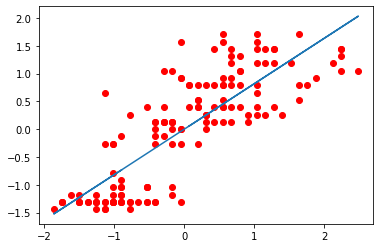

In [370]:
reg = LinearRegression(n_features=1)

params = reg.train(x, target, epochs=200, learning_rate=0.225)
print(params[0][-1], params[1][-1])
plt.scatter(x, target, color='red')
pred = reg.predict(np.array(x))
plt.plot(x, pred)

# 2.2.1.

In [371]:
import random
class LinearRegression_list:

    def __init__(self, n_features):
        self.W = [[-1 + 2 * random.random() for _ in range(1)]
                  for _ in range(n_features)]  # weights
        self.b = [random.random()]  # intercept

    def descent(self, delta_W, delta_b, learning_rate):
        # updating the weights with the calculated gradients
        for i in range(len(self.W)):
            for e in range(len(self.W[i])):
                self.W[i][e] -= learning_rate*delta_W

        for i in range(len(self.b)):
            self.b[i] -= learning_rate*delta_b

    def derivatives(self, X, Y):
        # partial derivative of cost w.r.t the weights
        delta_W = 0
        for i in range(len(X)):
            for e in range(len(X[i])):
                for j in range(len(self.W)):
                    for k in range(len(self.W[j])):
                        delta_W += ((X[i][e] * self.W[j][k] + self.b[j]) - Y[i][e]) * X[i][e]
        delta_W *= 2 / len(X)

        # partial derivative of cost w.r.t the intercept
        delta_b = 0
        for i in range(len(X)):
            for e in range(len(X[i])):
                for j in range(len(self.W)):
                    for k in range(len(self.W[j])):
                        delta_b += (X[i][e] * self.W[j][k] + self.b[j]) - Y[i][e]
        delta_b *= 2 / len(X)

        return delta_W, delta_b

    # fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):

        # Reshaping X and Y
        x_temp = []
        y_temp = []

        for i in range(len(X)):
            x_temp.append([X[i]])    

        for i in range(len(Y)):
            y_temp.append([Y[i]])

        X = x_temp
        Y = y_temp

        for i in range(epochs):

            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
            

        return self.W, self.b

    def predict(self, X):
        
        # Reshaping X
        x_temp = []

        for i in range(len(X)):
            x_temp.append([X[i]])    

        X = x_temp

        product = X
        for i in range(len(product)):
            for e in range(len(product[i])):
                for j in range(len(self.W)):
                    for k in range(len(self.W[j])):
                        for l in range(len(self.b)):
                            product[i][e] = product[i][e] * self.W[j][k] + self.b[l]


        return product

[0.8179411262715757] 8.764586207536194e-17


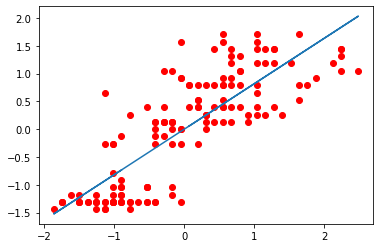

In [372]:
reg = LinearRegression_list(n_features=1)

params = reg.train(x, target, epochs=200, learning_rate=0.225)
print(params[0][-1], params[1][-1])
plt.scatter(x, target, color='red')
pred = reg.predict(np.array(x))
plt.plot(x, pred)

# 2.2.2.

In [373]:
import torch

class LinearRegression_torch:

    def __init__(self, n_features):
        self.W = torch.empty(n_features, 1).normal_(-1, 1)  # weights
        self.b = torch.rand(1)  # intercept

    def descent(self, delta_W, delta_b, learning_rate):
        # updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W
        self.b -= learning_rate*delta_b

    def derivatives(self, X, Y):
        # partial derivative of cost w.r.t the weights
        delta_W = torch.sum(torch.mul(
            ((torch.matmul(X, self.W)+self.b)-Y), X))*2/X.shape[0]
        # partial derivative of cost w.r.t the intercept
        delta_b = torch.sum(((torch.matmul(X, self.W)+self.b)-Y))*2/X.shape[0]
        return delta_W, delta_b

    # fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = torch.Tensor(X).reshape(-1, 1)
        Y = torch.Tensor(Y).reshape(-1, 1)

        for i in range(epochs):

            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)

        return self.W, self.b

    def predict(self, X):
        product = torch.matmul(torch.Tensor(X).reshape(-1, 1), self.W)+self.b
        return product

tensor([0.8179]) tensor(-2.6968e-08)


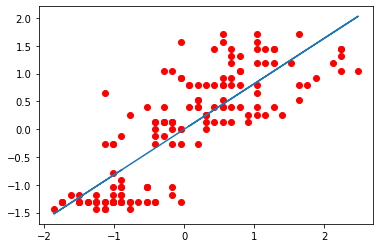

In [374]:
reg = LinearRegression_torch(n_features=1)

params = reg.train(x, target, epochs=200, learning_rate=0.225)
print(params[0][-1], params[1][-1])
plt.scatter(x, target, color='red')
pred = reg.predict(x)
plt.plot(x, pred)
plt.show()

## 2.2.3. Comparación entre implementaciones (numpy, listas, tensores)

### Utilizando set de datos Iris con dos features

In [375]:
start_time = time.time()
reg = LinearRegression(n_features=1)
params = reg.train(x, target, epochs=200, learning_rate=0.225)
pred = reg.predict(np.array(x))
end_time = time.time()
linear_regression_time = end_time - start_time

start_time = time.time()
reg = LinearRegression_list(n_features=1)
params = reg.train(x, target, epochs=200, learning_rate=0.225)
pred = reg.predict(np.array(x))
end_time = time.time()
linear_regression_list_time = end_time - start_time

start_time = time.time()
reg = LinearRegression_torch(n_features=1)
params = reg.train(x, target, epochs=200, learning_rate=0.225)
pred = reg.predict(x)
end_time = time.time()
linear_regression_torch_time = end_time - start_time

df1 = {'Time using numpy impl': [linear_regression_time],'Time using lists impl': [linear_regression_list_time] ,'Time using pytorch impl': [linear_regression_torch_time]}

pd.DataFrame(df1)

,Time using numpy impl,Time using lists impl,Time using pytorch impl
0,0.009531,0.077791,0.021218


### Utilizando set de datos creado por el grupo (dos features)

In [376]:
np.random.seed(0)

# Se crean dos features
X1 = np.random.randn(150, 1)
X2 = np.random.randn(150, 1) + 2

x1 = []
x2 = []

for i in range(len(X1)):
    x1.append(X1[i][0])
    x2.append(X2[i][0])

x1 = np.array(x1)
x2 = np.array(x2)

# Crear dos clases
y1 = np.zeros((75,))
y2 = np.ones((75,))
target = np.concatenate([y1, y2])

data = {'Class': target ,'X1': x1, 'X2': x2}

pd.DataFrame(data).head(10)


,Class,X1,X2
0,0.0,1.764052,1.931758
1,0.0,0.400157,3.713343
2,0.0,0.978738,1.255245
3,0.0,2.240893,1.173561
4,0.0,1.867558,1.901547
5,0.0,-0.977278,1.336522
6,0.0,0.950088,3.126636
7,0.0,-0.151357,0.920068
8,0.0,-0.103219,0.852531
9,0.0,0.410599,1.562180


## Feature engineering

In [377]:
x = (data['X1']-data['X1'].mean()) / data['X1'].std()
target = (data['X2']-data['X2'].mean()) / data['X2'].std()

print(x[:5],"\n")
print(target[:5],"\n")

[1.60612811 0.26931714 0.83640849 2.07349988 1.70757835] 

[ 0.00214521  1.83705204 -0.69461593 -0.77874443 -0.02896992] 



In [378]:
x.shape, target.shape

((150,), (150,))

[-0.03396563] -4.798072343593972e-16


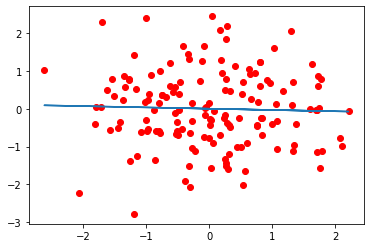

In [379]:
reg = LinearRegression(n_features=1)

params = reg.train(x, target, epochs=200, learning_rate=0.225)
print(params[0][-1], params[1][-1])
plt.scatter(x, target, color='red')
pred = reg.predict(np.array(x))
plt.plot(x, pred)

In [380]:
start_time = time.time()
reg = LinearRegression(n_features=1)
params = reg.train(x, target, epochs=200, learning_rate=0.225)
pred = reg.predict(np.array(x))
end_time = time.time()
linear_regression_time = end_time - start_time

start_time = time.time()
reg = LinearRegression_list(n_features=1)
params = reg.train(x, target, epochs=200, learning_rate=0.225)
pred = reg.predict(np.array(x))
end_time = time.time()
linear_regression_list_time = end_time - start_time

start_time = time.time()
reg = LinearRegression_torch(n_features=1)
params = reg.train(x, target, epochs=200, learning_rate=0.225)
pred = reg.predict(x)
end_time = time.time()
linear_regression_torch_time = end_time - start_time

df2 = {'Time using numpy impl': [linear_regression_time],'Time using lists impl': [linear_regression_list_time] ,'Time using pytorch impl': [linear_regression_torch_time]}

pd.DataFrame(df2)

,Time using numpy impl,Time using lists impl,Time using pytorch impl
0,0.007518,0.076677,0.021174


### Utilizando set de datos mostrado en clase (alturas y pesos)

In [381]:
df = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [382]:
# feature engineering?
x = (df['Weight']-df['Weight'].mean()) / df['Weight'].std()  # standardization of the dataset
target = (df["Height"]-df['Height'].mean()) / df["Height"].std()
x.shape, target.shape



((10000,), (10000,))

In [383]:
reg = LinearRegression(n_features=1)


[0.9247563] -2.510159133459974e-16


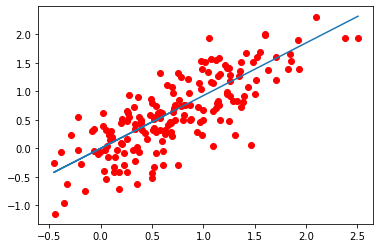

In [384]:
params = reg.train(x, target, epochs=200, learning_rate=0.225)
print(params[0][-1], params[1][-1])
plt.scatter(x[:180], target[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])


In [385]:
start_time = time.time()
reg = LinearRegression(n_features=1)
params = reg.train(x, target, epochs=200, learning_rate=0.225)
pred = reg.predict(np.array(x))
end_time = time.time()
linear_regression_time = end_time - start_time

start_time = time.time()
reg = LinearRegression_list(n_features=1)
params = reg.train(x, target, epochs=200, learning_rate=0.225)
pred = reg.predict(np.array(x))
end_time = time.time()
linear_regression_list_time = end_time - start_time

start_time = time.time()
reg = LinearRegression_torch(n_features=1)
params = reg.train(x, target, epochs=200, learning_rate=0.225)
pred = reg.predict(x)
end_time = time.time()
linear_regression_torch_time = end_time - start_time

df3 = {'Time using numpy impl': [linear_regression_time],'Time using lists impl': [linear_regression_list_time] ,'Time using pytorch impl': [linear_regression_torch_time]}

pd.DataFrame(df3)

,Time using numpy impl,Time using lists impl,Time using pytorch impl
0,0.030556,4.659432,0.039363


# Comparación de resultados finales de todas los tiempos para todos los algoritmos:

### - Dataset Iris:

In [386]:
pd.DataFrame(df1)

,Time using numpy impl,Time using lists impl,Time using pytorch impl
0,0.009531,0.077791,0.021218


### - Dataset propio:

In [387]:
pd.DataFrame(df2)

,Time using numpy impl,Time using lists impl,Time using pytorch impl
0,0.007518,0.076677,0.021174


### - Dataset altura y pesos:

In [388]:
pd.DataFrame(df3)

,Time using numpy impl,Time using lists impl,Time using pytorch impl
0,0.030556,4.659432,0.039363


### Análisis de resultados:

Como se puede observar, la implementación hecha con listas es la que tarda más con todos los datasets como es de esperarse ya que las bibliotecas de numpy y pytorch están optimizadas para ser lo más eficientes posibles a la hora de trabajar con operaciones matriciales, a diferencia de la implementación manual con listas la cual requiere iterar sobre todos los elementos de las matrices y aplicar cálculos matemáticos sobre cada índice. 